<a href="https://colab.research.google.com/github/cSimancasc/ApuntesTF/blob/main/01_tensorflow_fundamentals_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import tensorflow_probability as tfp
print(tf.__version__)

2.18.0


##**Accessing GPUs in TensorFlow with Google Colab**

Using Google Colab (CO) allows us to take advantage of online hardware acceleration, especially through the use of Graphics Processing Units (GPUs). This significantly speeds up model training and the processing of large datasets, as long as the code is properly structured and optimized.

To check which physical devices are available for TensorFlow to use, we can run:

In [ ]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

This command returns a list of accessible physical devices (such as CPU, GPU, or TPU). If the list is empty, it means TensorFlow does not have access to any additional devices beyond the default CPU.

In Colab, you can enable a GPU or TPU from the top left corner in the menu:
Runtime > Change runtime type, and then select the desired hardware accelerator.
It is important to note that changing the runtime type will completely reset the notebook, so you will need to re-run all the cells.

The technical specifications of the GPU are shown below.

In [ ]:
!nvidia-smi

Thu Jul 24 17:14:45 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   35C    P8              9W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

## **Introduction to Tensors-Creation and Dimensions**




*   Constant element tensors
*   Variable element tensors
*   Random element tensors
*   Mixed element tensors






A tensor is an n-dimensional data structure.
In the following examples, we work with:
+ Scalars (dimension = 0): a single numeric value.

+ Vectors (dimension = 1): a sequence of values.

+ Matrices (dimension = 2): an array of vectors arranged in rows and columns.

These are the most common forms when getting started with TensorFlow, although tensors can extend to higher dimensions.


We begin by creating tensors in a simple way using the tf.constant() command, which defines tensors with constant values. This function allows us to store numerical data in multidimensional structures. The first argument is the data to be stored, but we can optionally specify the data type (dtype) or the shape (shape) of the tensor.

The data type (dtype) is closely related to how numerical values are stored and processed on the computer. It becomes a useful tool when we need to trade precision for performance, especially when working with large amounts of data.

The shape of a tensor defines the number of dimensions and the size of each dimension. We could say it determines how the data is structured within the tensor.


In [ ]:
scalar=tf.constant(7)
scalar

<tf.Tensor: shape=(), dtype=int32, numpy=7>

In [ ]:
vector=tf.constant([10,10])
vector

<tf.Tensor: shape=(2,), dtype=int32, numpy=array([10, 10], dtype=int32)>

In [ ]:
matrix=tf.constant([[10,7],[7,10]])
matrix


<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[10,  7],
       [ 7, 10]], dtype=int32)>

In [ ]:
matrix_1=tf.constant([[10.,7.],[3.,2.],[8.,0.]],dtype=tf.float16)
matrix_1

<tf.Tensor: shape=(3, 2), dtype=float16, numpy=
array([[10.,  7.],
       [ 3.,  2.],
       [ 8.,  0.]], dtype=float16)>

We can access the dimension of a tensor using tensor.ndim. In TensorFlow, the dimension (also called the rank) refers to the number of axes that define the structure of the tensor. In the examples below, a scalar defines a simple constant number, so its dimension is 0. A vector represents a list of numbers, so its dimension is 1. Both matrix (shape = (2, 2)) and matrix_1 (shape = (3, 2)) are 2D tensors, since they have two axes (rows and columns), so their dimension is 2.

In [ ]:
scalar.ndim

0

In [ ]:
vector.ndim

1

In [ ]:
matrix.ndim

2

In [ ]:
matrix_1.ndim

2


*I assume this refers specifically to how TensorFlow handles data, since mathematically a vector is not necessarily a strictly 1-dimensional object, nor is a matrix strictly 2-dimensional. They are elements of a vector space whose dimension depends on the space itself and the elements involved.
In this context, dimension can be understood as the number of axes (or rank) of the tensor.*



In [ ]:
tensor=tf.constant([[[1,2,3],[4,5,6]],
                   [[7,8,9],[10,11,12]],
                   [[13,14,15],[16,17,18]]])
tensor

<tf.Tensor: shape=(3, 2, 3), dtype=int32, numpy=
array([[[ 1,  2,  3],
        [ 4,  5,  6]],

       [[ 7,  8,  9],
        [10, 11, 12]],

       [[13, 14, 15],
        [16, 17, 18]]], dtype=int32)>

In [ ]:
tensor.ndim

3

Unlike tf.constant, the tf.Variable command allows us to create tensors whose values can change over time.

In [ ]:
tensor_variable=tf.Variable([10,7])
tensor_constante=tf.constant([10,7])
tensor_variable,tensor_constante

(<tf.Variable 'Variable:0' shape=(2,) dtype=int32, numpy=array([10,  7], dtype=int32)>,
 <tf.Tensor: shape=(2,), dtype=int32, numpy=array([10,  7], dtype=int32)>)

In this case, variable tensors do not behave like NumPy arrays, and their values must be updated using the command tensor[position].assign(value).

In [ ]:
tensor_variable[0]=7
tensor_variable

TypeError: 'ResourceVariable' object does not support item assignment

In [ ]:
tensor_variable[0].assign(7)
tensor_variable

As we might expect, a constant tensor remains unchanged regardless of whether we try to update its values using assignment commands.

In [ ]:
tensor_constante[0].assign(7)

The tf.random.normal(shape=()) command creates a random tensor based on values drawn from a normal distribution and a previously specified seed. As long as the seed is the same, the values of two or more random tensors will also be the same, since they are generated in a pseudo-random manner.

In [ ]:
random_1=tf.random.Generator.from_seed(42)
random_1=random_1.normal(shape=(3,2))
random_2=tf.random.Generator.from_seed(42)
random_2=random_2.normal(shape=(3,2))

random_1,random_2,random_1==random_2

If we want a set of random tensors with different values, we must specify a different seed for each specific case.

In [ ]:
random_3=tf.random.Generator.from_seed(7)
random_3=random_3.normal(shape=(3,2))
random_2,random_3,random_2==random_3

Similarly, we can randomly shuffle the elements of a tensor using the tf.random.shuffle command, which randomly permutes along one of the dimensions of the tensor.

In [ ]:
no_mezclado=tf.constant([[10,7],[3,4],[2,5]])
tf.random.shuffle(no_mezclado)


If we want shuffled tensors to preserve the same order across different executions, we must set a random seed both at the operational level (inside the command) and at the global level (at the beginning of the code execution).

In [ ]:
tf.random.set_seed(42)
tf.random.shuffle(no_mezclado, seed=42)

##**Arrays, Conversion and Vector Processing**


*   Converting arrays to tensors
*   Extracting information
*   Indexing
*   Expanding dimensions
*   Converting tensors to arrays
*   One-hot encoding



We can generate zero and one tensors with a specified shape using the following commands: tf.zeros(shape) creates a tensor where all elements are 0, and the shape is defined by the tuple passed as an argument while tf.ones(shape) creates a tensor where all elements are 1, with the specified shape.

These commands are useful for initializing weights or defining placeholder structures in neural network models.

In [ ]:
tf.ones([10,7])

In [ ]:
tf.zeros(shape=(3,4))

In practice, it's very convenient to convert NumPy arrays into tensors. The key difference is that tensors can be used by TensorFlow to perform operations efficiently on accelerated hardware such as GPUs (Graphics Processing Units), whereas NumPy arrays only run on the CPU. This allows for faster processing of large datasets and complex numerical computations.

In [ ]:

numpy_A=np.arange(1,25,dtype=np.int32)
numpy_A

In [ ]:
A=tf.constant(numpy_A)
A

Once converted into tensors, we can modify their structure specifing the shape, as long as the total number of elements remains unchanged. This allows us to reorganize the tensor's shape without altering its data.

In [ ]:
B=tf.constant(numpy_A,shape=(2,3,4))
B

In [ ]:
C=tf.constant(numpy_A,shape=(4,9))
C

Now we aim to extract information from a tensor. We'll start by creating a tensor of rank four. As observed, the tensor consists of two main blocks, each of which contains three matrices of size 4×5. The dimension (or rank) of the tensor is dim = 4, because there are four levels of nesting.



In [ ]:
tensor_rango4=tf.zeros(shape=[2,3,4,5,])
tensor_rango4

<tf.Tensor: shape=(2, 3, 4, 5), dtype=float32, numpy=
array([[[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]],


       [[[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0.]]]], dtype=float32)>

In [ ]:
tensor_rango4.shape,tensor_rango4.ndim,tf.size(tensor_rango4)

(TensorShape([2, 3, 4, 5]), 4, <tf.Tensor: shape=(), dtype=int32, numpy=120>)

*  Data type (dtype): Specifies the type of data stored in each element (e.g., float32, int64).

* Dimension or rank (ndim or rank): Refers to the number of axes or levels of nesting in the tensor.

* Shape (shape): Describes the structure of the tensor by indicating how many elements are in each dimension. We could access the size of the i-th dimension throught shape[i].

* Total number of elements (tf.size(tensor)): Indicates how many elements are contained in the entire tensor.



In [ ]:
print("Tipo de dato de cada elemento=>", tensor_rango4.dtype)
print("Número de dimensiones(rango)=>", tensor_rango4.ndim)
print("Forma del tensor=>",tensor_rango4.shape)
print("Elementos del primer eje=>",tensor_rango4.shape[0])
print("Elementos del último eje=>",tensor_rango4.shape[-1])
print("Número total de elementos=>",tf.size(tensor_rango4))

Tensors can be indexed similarly to Python lists. For example, if we want to access the first two elements along each dimension, we can use slicing

In [ ]:
tensor_rango4[:2,:2,:2,:2]

<tf.Tensor: shape=(2, 2, 2, 2), dtype=float32, numpy=
array([[[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]],


       [[[0., 0.],
         [0., 0.]],

        [[0., 0.],
         [0., 0.]]]], dtype=float32)>

We can access elements more selectively. For example, if we want to remove one of the dimensions when indexing a tensor, we simply omit that dimension by using a list of indices for the remaining ones.

In [ ]:
tensor_rango4[:1,:,:1,:1]

In [ ]:
tensor_rango4[:3,:1,:,:1]

If we want to expand the dimensions of our tensor, we can do it in two different ways. In the first method, we take a lower-rank tensor and add a new dimension by specifying the axis using tf.newaxis.

Alternatively, a second way to do it is by using the command tf.expand_dims(tensor, axis), where we specify the tensor we want to expand and the axis at which to insert the new dimension.



In [ ]:
tensor_rango2=tf.zeros(shape=(2,2))
tensor_rango3_ejemplo1=tensor_rango2[...,tf.newaxis]
tensor_rango2,tensor_rango3_ejemplo1

In [ ]:
tf.expand_dims(tensor_rango2,axis=-1)

To convert a tensor into a NumPy array, we can do it in either of the following ways, as shown below.

In [ ]:
K=tf.constant(np.array([3.,7.,10.]))
K,np.array(K),K.numpy()

When building our code and using both simultaneously, it's important to consider the default data types of each. NumPy arrays are constructed using float64 by default, while TensorFlow tensors operate with float32 by default.

In [ ]:
numpy_K=tf.constant(np.array([3.,7.,10.]))
tensor_K=tf.constant([3.,7.,10.])
numpy_K.dtype,tensor_K.dtype

One-hot encoding takes a 1-dimensional list or vector and transforms it into a tensor where the non-zero values are specified by the indices provided in the input list or vector. We use the command tf.one_hot(list, depth=scalar_defining_dimension).

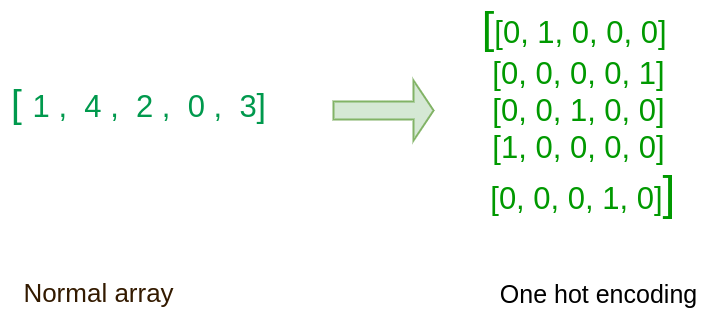

In [ ]:
lista=[0,1,2,3]
tf.one_hot(lista,depth=4)

<tf.Tensor: shape=(4, 4), dtype=float32, numpy=
array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]], dtype=float32)>

Similarly, we can also specify the data type or axis, as well as the values we want to assign to the indexed and non-indexed positions.

In [ ]:
tf.one_hot(lista,depth=4,on_value="index values",off_value="not index values")

<tf.Tensor: shape=(4, 4), dtype=string, numpy=
array([[b'index values', b'not index values', b'not index values',
        b'not index values'],
       [b'not index values', b'index values', b'not index values',
        b'not index values'],
       [b'not index values', b'not index values', b'index values',
        b'not index values'],
       [b'not index values', b'not index values', b'not index values',
        b'index values']], dtype=object)>

##**Basis Operations with Tensors**


*   Basic Operations
  *   Addition/Subtraction
  *   Product
      * tf.multiply-element-wise multiplication
      * tf.matmul-matrix multiplication
      * tf.tensordot-tensor contraction along specified axes
  * Other Operations
      * tf.square-square of each element
      * tf.sqrt-square root
      * tf.math.log-natural logarithm
*   Reshaping
*   Transposition



We can implement basic operations intuitively as follows.

In [ ]:
tensor=tf.constant([[10,7],[3,4]])
tensor+10


In [ ]:
tensor*10

In [ ]:
tensor-10

In practice, if we want to take advantage of the benefits offered by TensorFlow, it's advisable to perform these operations using its built-in functions. Below we show an example of a multiplication.

*This becomes essential when working with large volumes of data and aiming to compile on GPU*

In [ ]:
tf.multiply(tensor,10)

Operations with matrices or tensors follow the usual rules and can be performed using the NumPy library in Python or with TensorFlow's built-in command tf.matmul(tensor_i, tensor_j). As discussed in the previous section, the main advantage of using TensorFlow’s native operations lies in their ability to be compiled and optimized on GPUs, which becomes especially beneficial when dealing with large volumes of data.

In [ ]:
print(tensor)
tf.matmul(tensor, tensor)

In [ ]:
import numpy as np
np.dot(tensor,tensor)

Another way to perform matrix multiplication is by using tensor product operations through the command tf.tensordot(tensor, tensor, axes=i), where it is necessary to specify the axis along which we want to perform the multiplication.

In [ ]:
tf.tensordot(tensor, tensor,axes=1)

We complete our study of basic operations with powers, roots, and logarithms. When working with more complex operations like the latter two, we must be very aware of the data type of the input tensor and convert it accordingly, since these commands operate with floating-point numbers of variable precision.

In [ ]:
J=tf.range(1,10)
J

In [ ]:
tf.square(J)

In [ ]:
tf.sqrt(tf.cast(J,dtype=tf.float32))

In [ ]:
tf.math.log(tf.cast(J,dtype=tf.float32))

Some of the additional operations we can perform include reshaping and transposing, which modify the structure of the tensor. In the first case, we specify the desired shape, while the second simply transposes it in an algebraic sense.



In [ ]:
tensor_10=tf.constant([[1,2],[3,4],[5,6]])
tf.reshape(tensor_10,(2,3))

<tf.Tensor: shape=(2, 3), dtype=int32, numpy=
array([[1, 2, 3],
       [4, 5, 6]], dtype=int32)>

In [ ]:
tf.transpose(tensor_10)

##**Tensor Transformations and Statistical Operations**
*   Changing data type
*   Agregation
    *   Absolute value
    *   Min/Max/Mean-tf.reduce
*   Statistical operations-tf.stats
    *   Variance
    *   Standar deviation
*   Min/Max-tf.argmax/tf.argmin
*   Flatering tensors

A priori, the method used to create a tensor and the data provided determine its data type.

In [ ]:
B=tf.constant([1.7,7.4])
C=tf.constant([7,10])
B.dtype,C.dtype

The data type determines the model’s numerical precision.
The optimal approach is to combine 16-bit and 32-bit floating point types to train the model quickly and efficiently, while preserving numerical stability and accuracy.
Modern models use float32 by default; however, float16 and bfloat16 are available, offering lower memory usage and faster execution.
Taking all this into account, the dtype can be adjusted as needed using the following command.

In [ ]:
D=tf.cast(B,dtype=tf.float16)
E=tf.cast(C,dtype=tf.float32)

D.dtype,E.dtype

Aggregation refers to the process of condensing multiple values within a tensor into a smaller set of values.
We begin by computing the absolute value using the command: tf.abs(tensor).

In [ ]:
F=tf.constant([-7,-10])
F,tf.abs(F)

To find the minimum or maximum value of a tensor, we use the commands tf.reduce_min(tensor) and tf.reduce_max(tensor).
Note that, unlike the NumPy library in Python (np.min / np.max), these commands include the word reduce as a prefix.

In [ ]:
G=tf.constant(np.random.randint(0,100,size=50))
G,tf.reduce_min(G),tf.reduce_max(G)

Similarly, we can compute the mean and the sum of the tensor.

In [ ]:
tf.reduce_mean(G),tf.reduce_sum(G)

In practice, it is useful to rely on statistical commands when performing a preliminary analysis of the input and output data in our dataset.
We start by computing the variance and standard deviation using:
tfp.stats.variance(tensor) and tfp.stats.stddev(tensor).

Most commands in the statistics module require the input tensor to contain real or complex values. Therefore, we must convert the data to a float type with the desired level of precision.
Additionally, both variance and standard deviation can also be computed using the tf.math module, where the same requirement applies.

In [ ]:

G.dtype
tfp.stats.variance(G),tfp.stats.stddev(G)

NameError: name 'G' is not defined

In [ ]:
tfp.stats.variance(tf.cast(G,dtype=tf.float64)),tfp.stats.stddev(tf.cast(G,dtype=tf.float64))

In [ ]:
tf.math.reduce_variance(G),tf.math.reduce_std(G)

In [ ]:
tf.math.reduce_variance(tf.cast(G,dtype=tf.float32)),tf.math.reduce_std(tf.cast(G,dtype=tf.float32))

For a vector with a large number of elements, it can be useful to find the maximum or minimum value and also retrieve the index where it is located.
To do this, we use the commands tf.argmax(tensor) and tf.argmin(tensor), and perform indexing in the usual way, as commonly done in NumPy.

In [ ]:
tf.random.set_seed(42)
H=tf.random.uniform(shape=[50])
H

In [ ]:
tf.argmax(H),H[tf.argmax(H)]

In [ ]:
tf.argmin(H),H[tf.argmin(H)]

It is straightforward to verify that these indices are equivalent to those found using tf.reduce.

In [ ]:
tf.reduce_max(H)==H[tf.argmax(H)],tf.reduce_min(H)==H[tf.argmin(H)]

Flattening tensors involves reducing the dimensions of a tensor. This is useful when the tensor has many singular dimensions (of size 1) and is done using the command tf.squeeze.

In [ ]:
tf.random.set_seed(42)
I=tf.constant(tf.random.uniform(shape=[50]),shape=(1,1,1,1,50))
I

In [ ]:
I_aplastado=tf.squeeze(I)
I_aplastado